Data Analysis and Preprocessing

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('quikr_car.csv')

# Data cleaning
# Remove rows with 'Ask For Price' or missing prices
df = df[df['Price'] != 'Ask For Price']
df = df.dropna(subset=['Price'])

# Clean price column (remove commas and convert to float)
df['Price'] = df['Price'].str.replace(',', '').astype(float)

# Clean kms_driven (extract numeric value)
df['kms_driven'] = df['kms_driven'].str.extract('(\d+)').astype(float)

# Drop duplicates
df = df.drop_duplicates()

# Feature engineering
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df['age'] = 2023 - df['year']  # Assuming current year is 2023

# Encode categorical variables
label_encoders = {}
for column in ['company', 'fuel_type']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Select relevant features
features = ['company', 'year', 'kms_driven', 'fuel_type', 'age']
target = 'Price'

# Split data
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Model Training

In [3]:
# Initialize and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error: {mae}")
print(f"Model Score: {model.score(X_test, y_test)}")

Mean Absolute Error: 143564.7740564374
Model Score: 0.36938602053224934


Create Prediction Function

In [4]:
def predict_car_price(company, year, kms_driven, fuel_type):
    # Create a dataframe with the input data
    input_data = pd.DataFrame({
        'company': [company],
        'year': [year],
        'kms_driven': [kms_driven],
        'fuel_type': [fuel_type],
        'age': [2023 - year]
    })
    
    # Encode categorical variables using the same encoders
    input_data['company'] = label_encoders['company'].transform(input_data['company'])
    input_data['fuel_type'] = label_encoders['fuel_type'].transform(input_data['fuel_type'])
    
    # Make prediction
    predicted_price = model.predict(input_data)
    return predicted_price[0]

# Example usage
company = 'Maruti'
year = 2018
kms_driven = 25000
fuel_type = 'Petrol'

predicted_price = predict_car_price(company, year, kms_driven, fuel_type)
print(f"Predicted Price: ₹{predicted_price:,.2f}")

Predicted Price: ₹546,500.00


Feature Importance Visualization

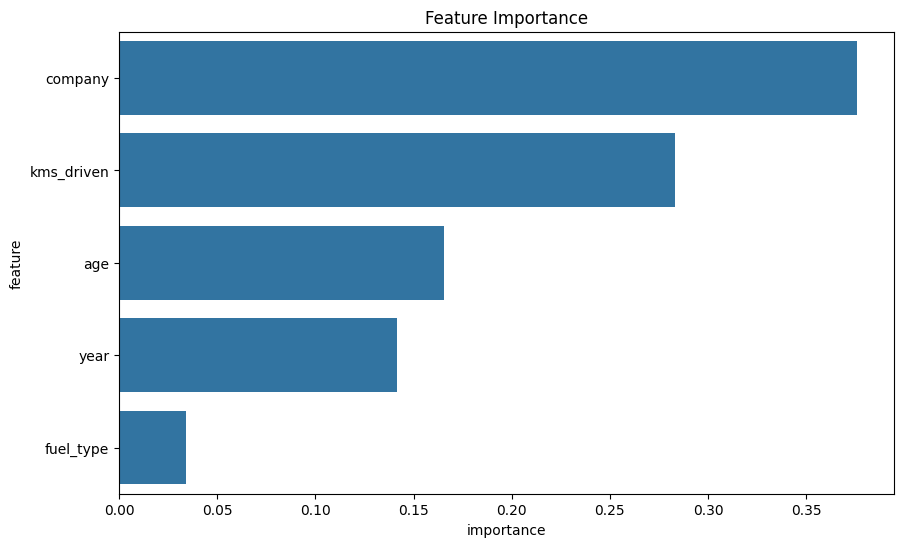

In [5]:
# Get feature importances
importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
feature_importance = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()

In [7]:
joblib.dump(label_encoders['company'], 'company_encoder.pkl')
joblib.dump(label_encoders['fuel_type'], 'fuel_type_encoder.pkl')


['fuel_type_encoder.pkl']

In [8]:
import joblib

# Save model
joblib.dump(model, 'model.pkl')

# Later, to load:
# model = joblib.load('model.pkl')


['model.pkl']